## Getting Rid of Field Stars

-----------------
Author: Erin Motherway
Date: 7/6/2022

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [1]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#read in phot file
photData = pd.read_csv("/Users/Claire/Documents/Code/current/ANNACRNN/getGaiaData/NGC_6819_dir/NGC_6819.phot", sep='\s+')
df = pd.DataFrame(photData)
display(df)

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
0,10010400015,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-9.9000,-9.9000,0.020,0.020,0.021,1.1,0.0,1,0.156,1
1,10618000016,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,0.0200,0.1720,0.023,0.020,0.020,1.1,0.0,1,0.192,1
2,10719500017,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-9.9000,-9.9000,0.023,0.026,0.020,1.1,0.0,1,0.218,1
3,11321600029,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-9.9000,-9.9000,0.023,0.031,0.020,1.1,0.0,1,0.271,1
4,10007800034,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-9.9000,-9.9000,0.023,0.020,0.020,1.1,0.0,1,0.230,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,10795327402,20.5497,21.4968,19.6631,21.9620,20.7652,19.9424,19.6126,19.3257,99.900,...,0.0200,0.0370,-9.900,-9.900,-9.900,1.1,0.0,1,0.427,1
2097,10463027454,20.5554,21.6157,19.6110,22.1913,20.8127,19.9937,19.5663,19.2965,99.900,...,0.0395,0.0308,-9.900,-9.900,-9.900,1.1,0.0,1,0.116,1
2098,10572927462,20.5560,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.851,...,-9.9000,-9.9000,0.163,0.156,-9.900,1.1,0.0,1,0.184,1
2099,12808627840,20.6075,21.4792,19.5336,22.0239,20.8169,19.9617,19.5805,19.2392,99.900,...,0.0475,0.0414,-9.900,-9.900,-9.900,1.1,0.0,1,0.100,1


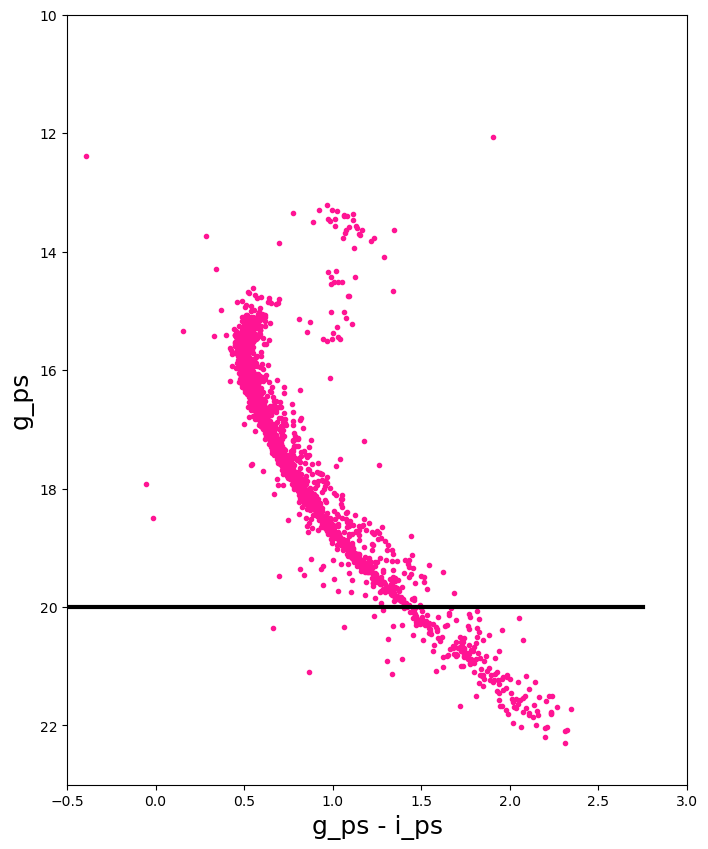

In [3]:
# plot CMD 
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=-0.5
x2=2.75
y1=20
y2=20
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [177]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 2.9777777777777774 .
The intercept for this line is 14.011111111111111 .


In [ ]:
#copy this onto command line in gitbash with changed m and b values
#cat M35.phot | awk '{if (NR == 1 || $5 < m*($5 - $7) + b) print $0}' > M35.new.phot

In [172]:
#read in new phot file
newPhotData = pd.read_csv('M35.new.phot',delim_whitespace=True)
df2 = pd.DataFrame(newPhotData)

Text(0, 0.5, 'g_ps')

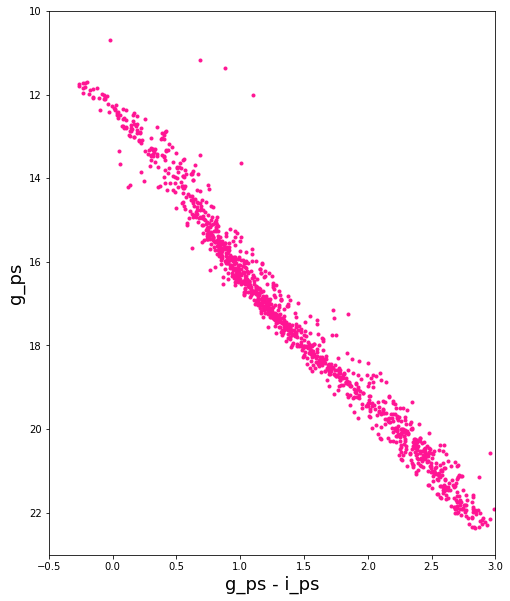

In [176]:
#plot new CMD
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df2['g_ps']-df2['i_ps'],df2['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)